In [2]:
from keras.models import Sequential
from keras.layers import Dense 
from keras.optimizers import Adam, SGD

%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [5]:
df=pd.read_csv('./nyc_weather.csv')
df

,EST,Temperature,DewPoint,Humidity,Sea Level PressureIn,VisibilityMiles,WindSpeedMPH,PrecipitationIn,CloudCover,Events,WindDirDegrees
0,1/1/2016,38,23,52,30.03,10,8.0,0,5,NaN,281
1,1/2/2016,36,18,46,30.02,10,7.0,0,3,NaN,275
2,1/3/2016,40,21,47,29.86,10,8.0,0,1,NaN,277
3,1/4/2016,25,9,44,30.05,10,9.0,0,3,NaN,345
4,1/5/2016,20,-3,41,30.57,10,5.0,0,0,NaN,333
5,1/6/2016,33,4,35,30.50,10,4.0,0,0,NaN,259
6,1/7/2016,39,11,33,30.28,10,2.0,0,3,NaN,293
7,1/8/2016,39,29,64,30.20,10,4.0,0,8,NaN,79
8,1/9/2016,44,38,77,30.16,9,8.0,T,8,Rain,76
9,1/10/2016,50,46,71,29.59,4,NaN,1.8,7,Rain,109


In [6]:
X=df[['Temperature']].values
y_true=df[['Humidity']].values

In [8]:
model = Sequential()
model.add(Dense(1, input_shape=(1,)))

In [9]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [11]:
model.compile(Adam(lr=0.8), 'mean_squared_error')

In [12]:
model.fit(X,y_true, epochs=40)

Epoch 1/40
31/31 [==============================] - 1s 47ms/step - loss: 7046.2480
Epoch 2/40
31/31 [==============================] - 0s 129us/step - loss: 3047.3328
Epoch 3/40
31/31 [==============================] - 0s 129us/step - loss: 798.2763
Epoch 4/40
31/31 [==============================] - 0s 97us/step - loss: 135.1075
Epoch 5/40
31/31 [==============================] - 0s 484us/step - loss: 583.1527
Epoch 6/40
31/31 [==============================] - 0s 161us/step - loss: 1389.9186
Epoch 7/40
31/31 [==============================] - 0s 129us/step - loss: 1912.7233
Epoch 8/40
31/31 [==============================] - 0s 129us/step - loss: 1930.8732
Epoch 9/40
31/31 [==============================] - 0s 129us/step - loss: 1553.5194
Epoch 10/40
31/31 [==============================] - 0s 65us/step - loss: 1008.0754
Epoch 11/40
31/31 [==============================] - 0s 97us/step - loss: 510.0174
Epoch 12/40
31/31 [==============================] - 0s 129us/step - loss: 204.116

In [13]:
y_pred=model.predict(X)

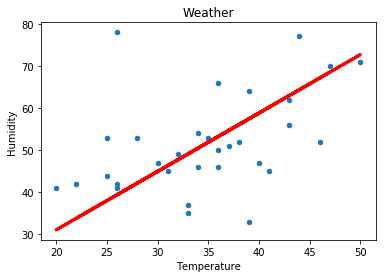

In [14]:
df.plot(kind='scatter',
       x='Temperature',
       y='Humidity', title='Weather')
plt.plot(X, y_pred, color='red', linewidth=3)

In [15]:
w,b=model.get_weights()

In [20]:
b.mean()


3.345108